## Neural Network Algorithms

- [Importable source code (most up-to-date version)](https://github.com/sylvaticus/BetaML.jl/blob/master/src/Nn.jl) - [Julia Package](https://github.com/sylvaticus/BetaML.jl)
- [Demonstrative static notebook](https://github.com/sylvaticus/BetaML.jl/blob/master/notebooks/Nn.ipynb)
- [Demonstrative live notebook](https://mybinder.org/v2/gh/sylvaticus/BetaML.jl/master?filepath=notebooks%2FNn.ipynb) (temporary personal online computational environment on myBinder) - it can takes minutes to start with!
- Theory based on [MITx 6.86x - Machine Learning with Python: from Linear Models to Deep Learning](https://github.com/sylvaticus/MITx_6.86x) ([Unit 3](https://github.com/sylvaticus/MITx_6.86x/blob/master/Unit%2003%20-%20Neural%20networks/Unit%2003%20-%20Neural%20networks.md))
- New to Julia? [A concise Julia tutorial](https://github.com/sylvaticus/juliatutorial) - [Julia Quick Syntax Reference book](https://julia-book.com)


In [1]:
using Pkg
if ! haskey(Pkg.dependencies(), "StatsPlots")
    Pkg.add("StatsPlots")
end
using BetaML.Nn, Random, DelimitedFiles, StatsPlots
Random.seed!(123);

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/dev/BetaML/Project.toml`
 [no changes]
   Updating `~/.julia/dev/BetaML/Manifest.toml`
 [no changes]
┌ Info: Precompiling BetaML [024491cd-cc6b-443e-8034-08ea7eb7db2b]
└ @ Base loading.jl:1260


## Non-linear regression

In [2]:
# Set Random data
xtrain = rand(3000,3)
ytrain = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtrain))]
xtest  = rand(300,3)
ytest  = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtest))]

300-element Array{Float64,1}:
 1.3255856733435873
 1.1071026899245373
 1.3894364502443532
 1.3249567356379555
 1.2448902290698893
 1.0934248345698743
 1.5427062757081176
 1.7406198744566959
 1.5884020550850704
 1.7012929087890027
 1.4940001875179245
 1.4975475302388948
 1.365931802477326
 ⋮
 1.0390385538109934
 1.0817546118112942
 1.439758839733331
 1.5310949342647984
 1.4276214512267411
 1.3396449886879134
 1.5787838969818437
 1.3606822990452454
 1.2816152051234078
 1.4841607375871988
 1.2904978749057252
 1.6837002403038692

In [3]:
# Define the network
l1   = DenseLayer(3,2)
l2   = DenseLayer(2,2,f=relu)
l3   = DenseLayer(2,1)
mynn = buildNetwork([l1,l2,l3],squaredCost,name="Feed-forward Neural Network Model 1")

NN(Layer[DenseLayer([0.8174535605328586 0.7166884679582948 0.7540137440697796; 0.1366690115483593 0.9333313407899195 0.8250054907607947], [0.20092395348618486, 0.16253346100611155], identity, nothing), DenseLayer([0.25153403368354077 0.9412744572975638; 0.22813558115889943 0.22600225469325586], [0.20892150600846326, 0.8289784689687791], BetaML.Utils.relu, nothing), DenseLayer([0.4215445785476575 0.4424289757716888], [0.6928481390816039], identity, nothing)], BetaML.Utils.squaredCost, nothing, false, "Feed-forward Neural Network Model 1")

In [4]:
train!(mynn,xtrain,ytrain,epochs=100,batchSize=8,verbosity=STD,optAlg=SGD(λ = 0.1))

***
*** Training Feed-forward Neural Network Model 1 for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 8): 	 0.013503241760235292


Training the Neural Network...  1%|▎                    |  ETA: 0:36:06

Training.. 	 avg ϵ on (Epoch 10 Batch 8): 	 0.007517834609714325


Training the Neural Network... 13%|██▊                  |  ETA: 0:02:36

Training.. 	 avg ϵ on (Epoch 20 Batch 8): 	 0.004563954301254378


Training the Neural Network... 24%|█████                |  ETA: 0:01:17

Training.. 	 avg ϵ on (Epoch 30 Batch 8): 	 0.002812098163652813


Training the Neural Network... 35%|███████▍             |  ETA: 0:00:47

Training.. 	 avg ϵ on (Epoch 40 Batch 8): 	 0.0030836882651166207


Training the Neural Network... 46%|█████████▋           |  ETA: 0:00:31

Training.. 	 avg ϵ on (Epoch 50 Batch 8): 	 0.0034033844366449994


Training the Neural Network... 56%|███████████▊         |  ETA: 0:00:22

Training.. 	 avg ϵ on (Epoch 60 Batch 8): 	 0.004169674610908175


Training the Neural Network... 66%|█████████████▉       |  ETA: 0:00:15

Training.. 	 avg ϵ on (Epoch 70 Batch 8): 	 0.00305300902145673


Training the Neural Network... 76%|████████████████     |  ETA: 0:00:09

Training.. 	 avg ϵ on (Epoch 80 Batch 8): 	 0.0026968400164225784


Training the Neural Network... 85%|█████████████████▉   |  ETA: 0:00:05

Training.. 	 avg ϵ on (Epoch 90 Batch 8): 	 0.004375034201553491


Training the Neural Network... 96%|████████████████████▏|  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 100 Batch 8): 	 0.006726850591842104


Training the Neural Network...100%|█████████████████████| Time: 0:00:32


Training of 100 epoch completed. Final epoch error: 0.003763117139959706.


(epochs = 100, ϵ_epochs = [0.14753750508565602, 0.007952392348842041, 0.007159440212959436, 0.0065119814003509364, 0.005962936478592385, 0.005548094006704314, 0.005290132065340583, 0.005091853065421766, 0.004951645302108105, 0.004837030615162269  …  0.0037725945582941876, 0.003775306214798448, 0.00377118928518365, 0.003769853802830833, 0.0037690333346275173, 0.003768262796377548, 0.0037653724667779612, 0.0037643193897428646, 0.0037641910462772148, 0.003763117139959706], θ_epochs = Any[])

In [5]:
avgLossTraining = loss(mynn,xtrain,ytrain)

0.003763117139959706

In [6]:
avgLossTest = loss(mynn,xtest,ytest)

0.003778812541168205

In [7]:
ŷtest  = predict(mynn,xtest)
relMeanErrorTest = relMeanError(ŷtest,ytest)

0.05002453318430798

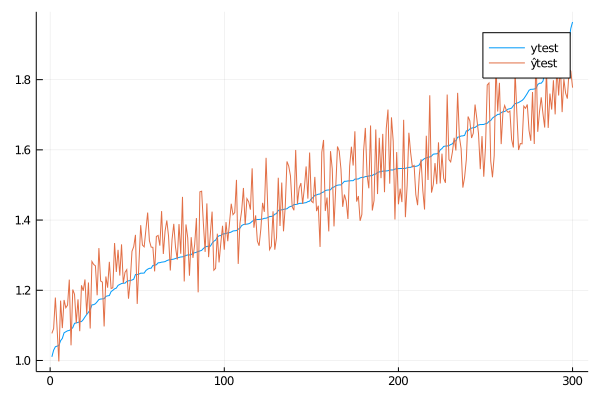

In [8]:
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedŶtest = ŷtest[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedŶtest],label=["ytest" "ŷtest"])


## Regression: scaling and manual derivatives

In [9]:
xtrain = pi*rand(1000)
ytrain = sin.(xtrain) + 0.5 * cos.(xtrain)
xtest = pi*rand(200)
ytest = sin.(xtest) + 0.5 * cos.(xtest)

200-element Array{Float64,1}:
 -0.19414762197737595
  1.1077150294245397
  0.9810598096463089
  0.31263932878309153
  1.086203939322224
  0.3103322308280642
  0.7651696263890292
  0.49044820410838874
  0.7210769505395018
 -0.3299915753277721
  1.0617763221919063
  1.0988923400696995
  1.0055833769605256
  ⋮
  1.1132762861016368
  0.85647735098561
  0.6130363572596009
  0.8074442088390438
 -0.45116091894908544
  0.9078751445046037
  0.9098053315934791
 -0.39364283859165566
  0.6648514110615946
  0.7015210475780591
  1.034166314655422
  0.5932179193097405

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 8): 	 3.7466431061356844
Training.. 	 avg ϵ on (Epoch 10 Batch 8): 	 0.10278030503318063
Training.. 	 avg ϵ on (Epoch 20 Batch 8): 	 0.07146518217710014
Training.. 	 avg ϵ on (Epoch 30 Batch 8): 	 0.15008662137347306
Training.. 	 avg ϵ on (Epoch 40 Batch 8): 	 0.14569657259704874
Training.. 	 avg ϵ on (Epoch 50 Batch 8): 	 0.1581464895218536


Training the Neural Network... 62%|█████████████        |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 60 Batch 8): 	 0.16838202033983823
Training.. 	 avg ϵ on (Epoch 70 Batch 8): 	 0.1121112984621036
Training.. 	 avg ϵ on (Epoch 80 Batch 8): 	 0.07292788121016834
Training.. 	 avg ϵ on (Epoch 90 Batch 8): 	 0.2405728100725027


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 8): 	 0.07478341948613688
Training of 100 epoch completed. Final epoch error: 0.10941936930385275.


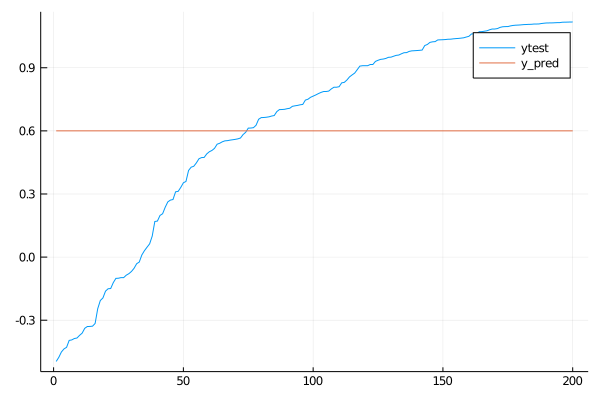

In [10]:
# No scaling...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
train!(myfnn,xtrain,ytrain,epochs=100,batchSize=8)
y_pred = predict(myfnn,xtest)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 8): 	 0.05317779339105633
Training.. 	 avg ϵ on (Epoch 10 Batch 8): 	 0.00019303852151490085
Training.. 	 avg ϵ on (Epoch 20 Batch 8): 	 0.00012370962468167396
Training.. 	 avg ϵ on (Epoch 30 Batch 8): 	 0.0002438955271261616
Training.. 	 avg ϵ on (Epoch 40 Batch 8): 	 0.00018255572938418238
Training.. 	 avg ϵ on (Epoch 50 Batch 8): 	 0.00037716515435449853
Training.. 	 avg ϵ on (Epoch 60 Batch 8): 	 9.678875419724826e-5
Training.. 	 avg ϵ on (Epoch 70 Batch 8): 	 4.5440747130123473e-5


Training the Neural Network... 73%|███████████████▍     |  ETA: 0:00:00

Training.. 	 avg ϵ on (Epoch 80 Batch 8): 	 9.345321872849619e-5
Training.. 	 avg ϵ on (Epoch 90 Batch 8): 	 8.11509047730539e-5
Training.. 	 avg ϵ on (Epoch 100 Batch 8): 	 7.72292286926578e-5


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training of 100 epoch completed. Final epoch error: 8.989791538598627e-5.


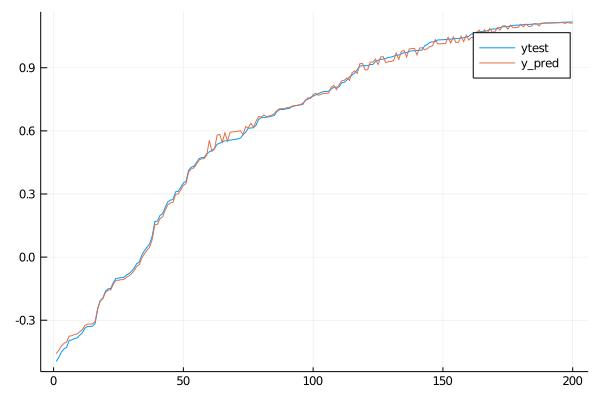

In [11]:
# Scaling of the X only...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
xScaleFactors= getScaleFactors(xtrain)
train!(myfnn,scale(xtrain),ytrain,epochs=100,batchSize=8)
y_pred = predict(myfnn,scale(xtest,xScaleFactors))
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 8): 	 0.2530537009588517
Training.. 	 avg ϵ on (Epoch 10 Batch 8): 	 0.001043053786198365
Training.. 	 avg ϵ on (Epoch 20 Batch 8): 	 0.00012882367704655594
Training.. 	 avg ϵ on (Epoch 30 Batch 8): 	 0.00040329076221982843
Training.. 	 avg ϵ on (Epoch 40 Batch 8): 	 7.784825534070758e-5
Training.. 	 avg ϵ on (Epoch 50 Batch 8): 	 6.42858214958878e-5
Training.. 	 avg ϵ on (Epoch 60 Batch 8): 	 0.00011244035920178877
Training.. 	 avg ϵ on (Epoch 70 Batch 8): 	 9.497918415600391e-5


Training the Neural Network... 74%|███████████████▌     |  ETA: 0:00:00

Training.. 	 avg ϵ on (Epoch 80 Batch 8): 	 0.00019343840045038996
Training.. 	 avg ϵ on (Epoch 90 Batch 8): 	 7.850297607885469e-5


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 8): 	 6.745493068858072e-5
Training of 100 epoch completed. Final epoch error: 0.00011608609620705458.


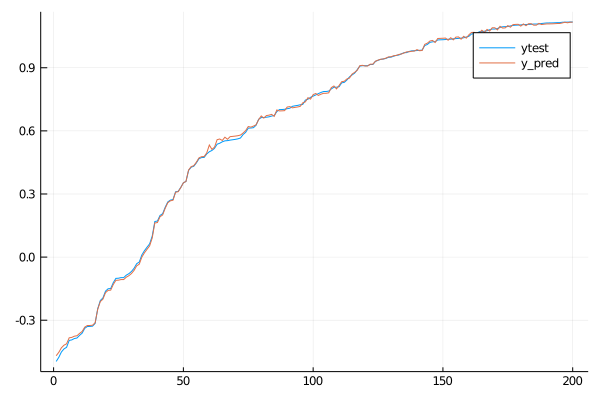

In [13]:
# Scaling of the X and of the Y...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
xScaleFactors = getScaleFactors(xtrain)
yScaleFactors = getScaleFactors(ytrain)
train!(myfnn,scale(xtrain),scale(ytrain),epochs=100,batchSize=8)
y_pred = scale(predict(myfnn,scale(xtest,xScaleFactors)),yScaleFactors,rev=true)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

## Classification

In [14]:
# Load the data
iris     = readdlm(joinpath(dirname(Base.find_package("BetaML")),"..","test","data","iris.csv"),',',skipstart=1)
iris     = iris[shuffle(axes(iris, 1)), :] # Shuffle the records, as they aren't by default
x        = convert(Array{Float64,2}, iris[:,1:4])
y        = map(x->Dict("setosa" => 1, "versicolor" => 2, "virginica" =>3)[x],iris[:, 5]) # Convert the target column to numbers
y_oh     = oneHotEncoder(y) # Convert to One-hot representation (e.g. 2 => [0 1 0], 3 => [0 0 1])

150×3 Array{Int64,2}:
 0  1  0
 0  0  1
 0  0  1
 1  0  0
 0  0  1
 1  0  0
 0  1  0
 1  0  0
 1  0  0
 0  1  0
 0  1  0
 1  0  0
 0  0  1
 ⋮     
 1  0  0
 0  1  0
 1  0  0
 1  0  0
 0  0  1
 0  0  1
 0  0  1
 1  0  0
 0  1  0
 0  0  1
 0  0  1
 1  0  0

In [15]:
# Split the data in training/testing sets
ntrain    = Int64(round(size(x,1)*0.8))
xtrain    = x[1:ntrain,:]
ytrain    = y[1:ntrain]
ytrain_oh = y_oh[1:ntrain,:]
xtest     = x[ntrain+1:end,:]
ytest     = y[ntrain+1:end]

30-element Array{Int64,1}:
 2
 2
 1
 2
 2
 3
 2
 3
 1
 1
 3
 2
 1
 ⋮
 1
 2
 1
 1
 3
 3
 3
 1
 2
 3
 3
 1

In [16]:
# Define the Artificial Neural Network model
l1   = DenseLayer(4,10,f=relu) # Activation function is ReLU
l2   = DenseLayer(10,3)        # Activation function is identity by default
l3   = VectorFunctionLayer(3,3,f=softMax) # Add a (parameterless) layer whose activation function (softMax in this case) is defined to all its nodes at once
mynn = buildNetwork([l1,l2,l3],squaredCost,name="Multinomial logistic regression Model Sepal") # Build the NN and use the squared cost (aka MSE) as error function



NN(Layer[DenseLayer([0.7222322069881626 0.6919282258785908 0.1911251584855833 0.09545846412528247; 0.7807528112993407 0.03384466336239211 0.16985580375643572 0.022275570137957557; … ; 0.09159015916149005 0.35803348053956485 0.2753692322687409 0.4013206948994599; 0.0038110047248387513 0.5393769817352598 0.8441284352912515 0.687428663989994], [0.45864386785768785, 0.7815589224672592, 0.8527186698497164, 0.37934513294402095, 0.14760713937917824, 0.3755396726815534, 0.24969097756926817, 0.31412231405137736, 0.2583698447798768, 0.8256275016170687], BetaML.Utils.relu, nothing), DenseLayer([0.4431098858314759 0.4399681260769064 … 0.24641924318360187 0.19528718798371303; 0.4800621794222275 0.5614863101774221 … 0.4093172187204346 0.15313719084579058; 0.2007258712702964 0.15026388329608453 … 0.5566533259363786 0.5117022177817334], [0.3873798950201788, 0.9570044138471672, 0.1296234524667932], identity, nothing), VectorFunctionLayer(3, 3, BetaML.Utils.softMax, nothing)], BetaML.Utils.squaredCost, 

In [17]:
# Training it (default to SGD)
res = train!(mynn,scale(xtrain),ytrain_oh,epochs=100,batchSize=6) # Use optAlg=SGD (Stochastic Gradient Descent) by default

***
*** Training Multinomial logistic regression Model Sepal for 100 epochs with algorithm SGD.


Training the Neural Network...  1%|▎                    |  ETA: 0:03:49

Training.. 	 avg ϵ on (Epoch 1 Batch 6): 	 0.294179065629015
Training.. 	 avg ϵ on (Epoch 10 Batch 6): 	 0.01097278532161542
Training.. 	 avg ϵ on (Epoch 20 Batch 6): 	 0.002724227693504437
Training.. 	 avg ϵ on (Epoch 30 Batch 6): 	 0.04945796820384383
Training.. 	 avg ϵ on (Epoch 40 Batch 6): 	 0.001309119309808343
Training.. 	 avg ϵ on (Epoch 50 Batch 6): 	 0.002405651685957477
Training.. 	 avg ϵ on (Epoch 60 Batch 6): 	 0.019674858508593983
Training.. 	 avg ϵ on (Epoch 70 Batch 6): 	 0.05053704766585709


Training the Neural Network... 77%|████████████████▏    |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 80 Batch 6): 	 0.0017718319589703627
Training.. 	 avg ϵ on (Epoch 90 Batch 6): 	 0.05233457600115866


Training the Neural Network...100%|█████████████████████| Time: 0:00:03


Training.. 	 avg ϵ on (Epoch 100 Batch 6): 	 0.00037985943542416767
Training of 100 epoch completed. Final epoch error: 0.016515872616307447.


(epochs = 100, ϵ_epochs = [0.4585978728386833, 0.16993877831109508, 0.05159399941024892, 0.04472230958957087, 0.03177460749654901, 0.02882118340663376, 0.026789086787278475, 0.028158024679298236, 0.02432150959178629, 0.023634183443849648  …  0.016671054357777815, 0.01664809953492102, 0.01664059304629106, 0.016616054532293575, 0.016593781675746107, 0.016573848230088787, 0.016558565030726974, 0.01654292003579714, 0.016530884557251442, 0.016515872616307447], θ_epochs = Any[])

In [18]:
# Test it
ŷtrain        = predict(mynn,scale(xtrain))   # Note the scaling function
ŷtest         = predict(mynn,scale(xtest))
trainAccuracy = accuracy(ŷtrain,ytrain,tol=1) # 0.983
testAccuracy  = accuracy(ŷtest,ytest,tol=1)   # 1.0

0.9666666666666667

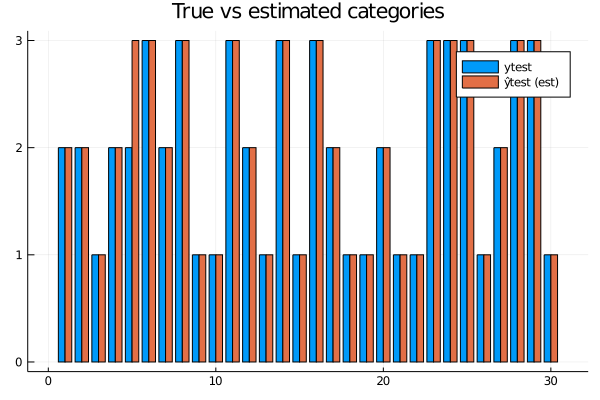

In [19]:
# Visualise results
testSize = size(ŷtest,1)
ŷtestChosen =  [argmax(ŷtest[i,:]) for i in 1:testSize]
groupedbar([ytest ŷtestChosen], label=["ytest" "ŷtest (est)"], title="True vs estimated categories") # All records correctly labelled !

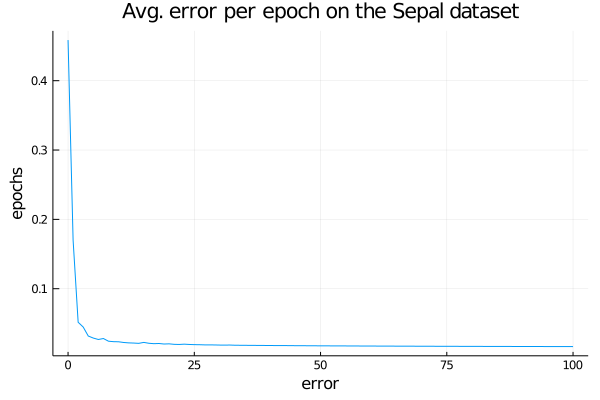

In [20]:
plot(0:res.epochs,res.ϵ_epochs, ylabel="epochs",xlabel="error",legend=nothing,title="Avg. error per epoch on the Sepal dataset")